In [1]:
import os
from glob import glob
import pandas as pd
import numpy as np

In [2]:
root = 'data'
pathCsv = os.path.join(root, 'HAM10000_metadata.csv')
df = pd.read_csv(pathCsv)

In [3]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [5]:
df['age'].fillna((df['age'].mean()), inplace=True)
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [6]:
df['Class'] = pd.Categorical(df['dx']).codes

Path = {}
for item in glob(os.path.join(root, 'reshaped', '*.jpg')):
    filename = os.path.splitext(os.path.basename(item))[0]
    Path[filename] = item

df['path'] = df['image_id'].map(Path.get)

In [7]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Class,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,data/reshaped/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,data/reshaped/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,data/reshaped/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,data/reshaped/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,data/reshaped/ISIC_0031633.jpg


In [8]:
print(df.dtypes)

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
Class              int8
path             object
dtype: object


In [9]:
from PIL import Image
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x)))
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Class,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,data/reshaped/ISIC_0027419.jpg,"[[[190, 155, 188], [190, 155, 188], [190, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,data/reshaped/ISIC_0025030.jpg,"[[[22, 15, 33], [20, 11, 30], [25, 13, 33], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,data/reshaped/ISIC_0026769.jpg,"[[[175, 127, 141], [181, 131, 143], [192, 138,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,data/reshaped/ISIC_0025661.jpg,"[[[29, 9, 18], [28, 9, 15], [44, 21, 27], [56,..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,data/reshaped/ISIC_0031633.jpg,"[[[133, 87, 113], [151, 103, 129], [163, 115, ..."


In [10]:
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [11]:
df_nv = df[df.dx=='nv']
df_mel = df[df.dx=='mel']
df_bkl = df[df.dx=='bkl']
df_bcc = df[df.dx=='bcc']
df_akiec = df[df.dx=='akiec']
df_vasc = df[df.dx=='vasc']
df_df = df[df.dx=='df']
df_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Class,path,image
1095,HAM_0005276,ISIC_0027008,df,histo,75.0,male,back,3,data/reshaped/ISIC_0027008.jpg,"[[[155, 110, 105], [166, 121, 116], [178, 133,..."
1096,HAM_0005276,ISIC_0028790,df,histo,75.0,male,back,3,data/reshaped/ISIC_0028790.jpg,"[[[205, 159, 169], [212, 167, 174], [217, 170,..."
1097,HAM_0004103,ISIC_0028880,df,histo,55.0,male,lower extremity,3,data/reshaped/ISIC_0028880.jpg,"[[[221, 187, 212], [223, 189, 214], [223, 190,..."
1098,HAM_0004103,ISIC_0031309,df,histo,55.0,male,lower extremity,3,data/reshaped/ISIC_0031309.jpg,"[[[30, 14, 25], [46, 28, 40], [63, 45, 57], [8..."
1099,HAM_0001164,ISIC_0030021,df,histo,50.0,female,upper extremity,3,data/reshaped/ISIC_0030021.jpg,"[[[198, 155, 162], [198, 155, 162], [198, 155,..."


In [12]:
from sklearn.utils import resample

df_df_upsample = resample(df_df, 
                                 replace=True,     
                                 n_samples=1500,    
                                 random_state=123)
df_nv_downsample = resample(df_nv, 
                                 replace=True,     
                                 n_samples=1500,    
                                 random_state=123)
df_mel_upsample = resample(df_mel, 
                                 replace=True,     
                                 n_samples=1500,    
                                 random_state=123)
df_bkl_upsample = resample(df_bkl, 
                                 replace=True,     
                                 n_samples=1500,    
                                 random_state=123)
df_bcc_upsample = resample(df_bcc, 
                                 replace=True,     
                                 n_samples=1500,    
                                 random_state=123)
df_akiec_upsample = resample(df_akiec, 
                                 replace=True,     
                                 n_samples=1500,    
                                 random_state=123)
df_vasc_upsample = resample(df_vasc, 
                                 replace=True,     
                                 n_samples=1500,    
                                 random_state=123)



In [13]:
df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'Class', 'path', 'image'],
      dtype='object')

In [14]:
df_resampled = pd.DataFrame(columns=['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
        'path', 'image'],
      dtype='object')

In [15]:
df_resampled.shape

(0, 9)

In [16]:
df_resampled = pd.concat([df_resampled, df_df_upsample])
df_resampled.shape

/Users/shalu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(1500, 10)

In [17]:
df_resampled = pd.concat([df_resampled, df_nv_downsample])
df_resampled.shape

/Users/shalu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(3000, 10)

In [18]:
df_resampled = pd.concat([df_resampled, df_mel_upsample])
df_resampled.shape

/Users/shalu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(4500, 10)

In [19]:
df_resampled = pd.concat([df_resampled, df_bkl_upsample])
df_resampled.shape

/Users/shalu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(6000, 10)

In [20]:
df_resampled = pd.concat([df_resampled, df_bcc_upsample])
df_resampled.shape

/Users/shalu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(7500, 10)

In [21]:
df_resampled = pd.concat([df_resampled, df_akiec_upsample])
df_resampled.shape

/Users/shalu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(9000, 10)

In [22]:
df_resampled = pd.concat([df_resampled, df_vasc_upsample])
df_resampled.shape

/Users/shalu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(10500, 10)

In [23]:
df = df_resampled
df['dx'].value_counts()

bkl      1500
mel      1500
akiec    1500
nv       1500
vasc     1500
bcc      1500
df       1500
Name: dx, dtype: int64

In [24]:
df.shape

(10500, 10)

In [25]:
df.head()

,Class,age,dx,dx_type,image,image_id,lesion_id,localization,path,sex
1204,3.0,35.0,df,consensus,"[[[235, 175, 187], [231, 171, 183], [231, 171,...",ISIC_0025314,HAM_0000757,lower extremity,data/reshaped/ISIC_0025314.jpg,female
1161,3.0,40.0,df,consensus,"[[[185, 159, 198], [182, 156, 195], [182, 156,...",ISIC_0024330,HAM_0006188,lower extremity,data/reshaped/ISIC_0024330.jpg,male
1187,3.0,60.0,df,consensus,"[[[189, 133, 136], [190, 134, 137], [192, 135,...",ISIC_0026471,HAM_0006787,lower extremity,data/reshaped/ISIC_0026471.jpg,male
1193,3.0,55.0,df,consensus,"[[[228, 157, 163], [227, 156, 162], [228, 157,...",ISIC_0030665,HAM_0005359,lower extremity,data/reshaped/ISIC_0030665.jpg,female
1197,3.0,65.0,df,consensus,"[[[220, 147, 164], [220, 147, 164], [221, 148,...",ISIC_0026629,HAM_0004065,lower extremity,data/reshaped/ISIC_0026629.jpg,female


In [26]:
df.to_csv('saved.csv')

In [27]:
temp = df['image'][1].shape
count = 0
for i in range(df.shape[0]):
    count += 1
print("Dimensions of image: {}, number: {}".format(temp, count))
    

Dimensions of image: (2,), number: 10500


In [28]:
from sklearn.model_selection import train_test_split
x=df.drop(['Class'],axis=1)
y=df['Class']
xTrain, xTest, yTrain, yTest  = train_test_split(x, y, test_size=0.20, random_state=42)

In [29]:
x_train = np.asarray(xTrain['image'].tolist())
x_test = np.asarray(xTest['image'].tolist())
xTrainmean = np.mean(x_train)
xTrainstd = np.std(x_train)
xTestmean = np.mean(x_test)
xTeststd = np.std(x_test)
x_train = (x_train - xTrainmean)/xTrainstd
x_test = (x_test - xTestmean)/xTeststd

In [30]:
import keras
from keras.utils.np_utils import to_categorical

y_train = to_categorical(yTrain, num_classes = 7)
y_test = to_categorical(yTest, num_classes = 7)

/Users/shalu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [31]:
np.save("test_data_x", x_test)
np.save("test_data_y", yTest)

In [32]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))

In [33]:
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import itertools
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

dimensions = (75, 100, 3)
Classes = 7

model = Sequential()

model.add(Conv2D(32, (3, 3),activation='relu',padding = 'Same',input_shape=dimensions))
model.add(Conv2D(32, (3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(Classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 25, 64)        0         
__________

In [35]:
Info = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False,
        vertical_flip=False)

Info.fit(x_train)

In [36]:
Adam_Optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
SGD_optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer = SGD_optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
Lap = 75 
Volume = 10
history = model.fit_generator(Info.flow(x_train,y_train, batch_size=Volume),
                              epochs = Lap, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // Volume
                             )

Epoch 1/75
756/756 [==============================] - 209s 276ms/step - loss: 1.6992 - acc: 0.3165 - val_loss: 1.4382 - val_acc: 0.4571
Epoch 2/75
756/756 [==============================] - 203s 269ms/step - loss: 1.4384 - acc: 0.4362 - val_loss: 1.3800 - val_acc: 0.4607
Epoch 3/75
756/756 [==============================] - 200s 265ms/step - loss: 1.3340 - acc: 0.4860 - val_loss: 1.1928 - val_acc: 0.5476
Epoch 4/75
756/756 [==============================] - 201s 266ms/step - loss: 1.2614 - acc: 0.5086 - val_loss: 1.1034 - val_acc: 0.5810
Epoch 5/75
756/756 [==============================] - 206s 273ms/step - loss: 1.1958 - acc: 0.5415 - val_loss: 1.0776 - val_acc: 0.6155
Epoch 6/75
756/756 [==============================] - 202s 267ms/step - loss: 1.1399 - acc: 0.5664 - val_loss: 0.9602 - val_acc: 0.6357
Epoch 7/75
756/756 [==============================] - 202s 268ms/step - loss: 1.0985 - acc: 0.5803 - val_loss: 1.0207 - val_acc: 0.6381
Epoch 8/75
756/756 [============================

Epoch 61/75
756/756 [==============================] - 218s 288ms/step - loss: 0.4223 - acc: 0.8407 - val_loss: 0.3238 - val_acc: 0.9024
Epoch 62/75
756/756 [==============================] - 219s 290ms/step - loss: 0.4160 - acc: 0.8472 - val_loss: 0.3327 - val_acc: 0.8857
Epoch 63/75
756/756 [==============================] - 216s 286ms/step - loss: 0.4301 - acc: 0.8414 - val_loss: 0.3336 - val_acc: 0.8917
Epoch 64/75
756/756 [==============================] - 215s 285ms/step - loss: 0.3941 - acc: 0.8504 - val_loss: 0.3335 - val_acc: 0.8893
Epoch 65/75
756/756 [==============================] - 223s 295ms/step - loss: 0.4001 - acc: 0.8567 - val_loss: 0.3272 - val_acc: 0.8893
Epoch 66/75
756/756 [==============================] - 217s 287ms/step - loss: 0.4053 - acc: 0.8520 - val_loss: 0.3246 - val_acc: 0.8976
Epoch 67/75
756/756 [==============================] - 222s 294ms/step - loss: 0.3941 - acc: 0.8515 - val_loss: 0.3255 - val_acc: 0.8940
Epoch 68/75
756/756 [====================

In [37]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model_1500samples_50_keras_SGD.h5")

840/840 [==============================] - 8s 9ms/step
Validation: accuracy = 0.898810  ;  loss_v = 0.350992
Test: accuracy = 0.870952  ;  loss = 0.430865


In [38]:
#1. Function to plot model's validation loss and validation accuracy
import matplotlib.pyplot as plt
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

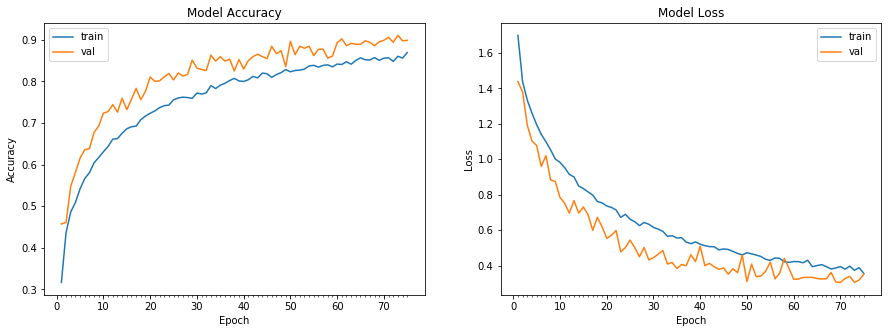

In [39]:
plot_model_history(history)